# Metrics, K-fold CV, KNN

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Read the dataset

In [11]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)

# Assign new headers to the DataFrame
data.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

# Drop the 'Sample code number' attribute 
data = data.drop(['Sample code number'],axis=1)

## Missing Values

In [12]:

# Convert the '?' to NaN
data = data.replace('?',np.NaN)

# Count the number of missing values in each attribute of the data.
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))
    
# Discard the data points that contain missing values
data = data.dropna()

Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


## Outliers ### 

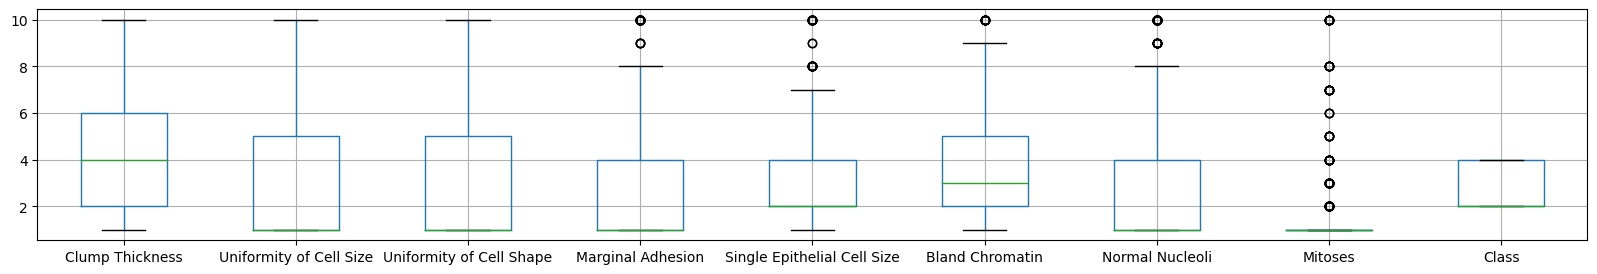

In [13]:
# Draw a boxplot to identify the columns in the table that contain outliers 

# The 'Bare Nuclei' attribute is a string. Convert it to a numerical attribute.
data.iloc[:,5]=pd.to_numeric(data.iloc[:,5])

data.boxplot(figsize=(20,3))
plt.show()

## Duplicate Data ### 

In [14]:
# Check for duplicate instances.
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

# Drop row duplicates
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

Number of duplicate rows = 234
Number of rows before discarding duplicates = 683
Number of rows after discarding duplicates = 449


## Sampling ### 

In [15]:
# Randomly select 1% of the data without replacement. The random_state argument of the function specifies the seed value of the random number generator.
sample = data.sample(frac=0.01, replace=False, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
415,3,3,2,6,3,3,3,5,1,2
400,3,10,8,7,6,9,9,3,8,4
240,5,1,3,3,2,2,2,3,1,2
33,2,1,1,2,2,1,3,1,1,2


### Separate the features and the target class
### Standardize the features.
### Modify the target values.

In [16]:
# Separate the features and the target class and modify the target features
X = data.drop(['Class'], axis=1)  # Features
y = data['Class'].replace({4: 1, 2: 0})  # Target where '4' becomes '1' (malignant) and '2' becomes '0' (benign)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

## Construct a NearestNeighbors classifier

In [17]:
# Construct a KNeighbors classifier
knn = KNeighborsClassifier()

## Compute and print out the metrics

In [18]:
# Define the metrics for evaluation
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

# Compute the averages of the accuracies, f1-scores, precisions, and recalls using 10-fold cross-validation
cv_results = cross_validate(knn, X_standardized, y, cv=10, scoring=scoring)

# Print out the average scores
print("Average Accuracy:", np.mean(cv_results['test_accuracy']))
print("Average F1-Score:", np.mean(cv_results['test_f1']))
print("Average Precision:", np.mean(cv_results['test_precision']))
print("Average Recall:", np.mean(cv_results['test_recall']))

Average Accuracy: 0.9488383838383838
Average F1-Score: 0.9512263469391129
Average Precision: 0.9561375218983915
Average Recall: 0.948731884057971


## Create and Display Confusion Matrix

[[45  3]
 [ 3 39]]


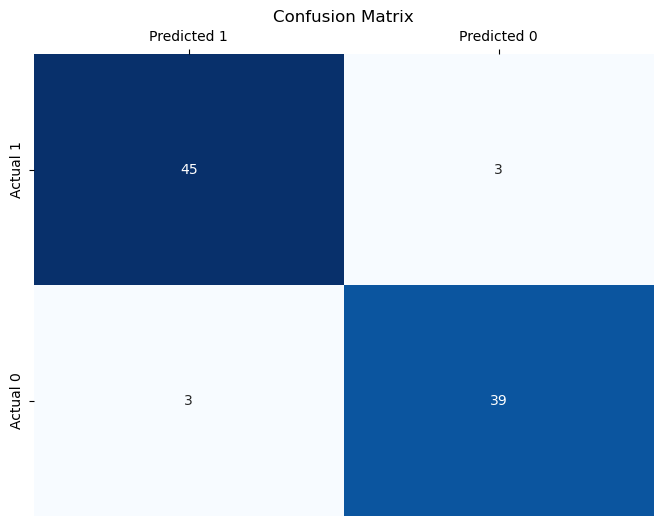

In [19]:
# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=1)

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Display the confusion matrix with seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 1', 'Predicted 0'], yticklabels=['Actual 1', 'Actual 0'], cbar=False)
plt.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)  # Moves x-axis labels to the top
plt.title('Confusion Matrix')
plt.show()